# Observer

## Propósito
O padrão Observer é um padrão comportamental que define uma dependência entre os objetos (mecaninsmo de assinatura, segundo o site Refactoring Guru), de forma que quando um objeto muda de estado, todos os seus dependentes são notificados automaticamente.

## Problemas
O problema que esse padrão busca resolver está relacionado a troca de informações entre dois objetos quando algum muda de um estado e tal mudança interessa o outro objeto.

## Solução
Adicionar uma lista de "inscritos" dentro de uma classe, junto com métodos públicos para que outros objetos se registrem como inscritos daquele objeto em específico para receber um sinal quando o mesmo for alterado. Com isso, quando ocorrer alguma mudança de estado, o objeto irá na sua lista de inscritos e chamará o método de notificação específico de cada um deles.

## Diagrama UML
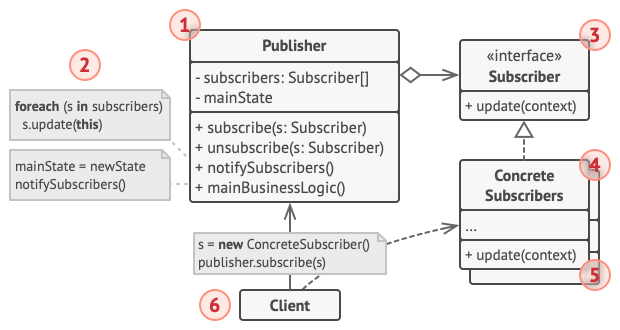

# Exemplo de Implementação do Padrão

In [ ]:
# Gerenciador de eventos que lida com a assinatura, cancelamento de assinatura e notificação. 
# Quando um event trocar de estado, ele chama o seu manager para notificar todos os objetos que estão na lista de inscritos.
class EventManager:
    def __init__(self):
        self.listeners = {}

    def subscribe(self, event_type, listener):
        if event_type not in self.listeners:
            self.listeners[event_type] = []
        self.listeners[event_type].append(listener)

    def unsubscribe(self, event_type, listener):
        if event_type in self.listeners:
            self.listeners[event_type].remove(listener)

    def notify(self, event_type, data):
        if event_type in self.listeners:
            for listener in self.listeners[event_type]:
                listener.update(data)


# Classe principal que inclui lógica de negócio e notifica os assinantes
# Na classe Editor, temos a implementação principal da lógica de negócio do sistema. 
# Ela utiliza o gerenciador de eventos (EventManager) para permitir que outras partes do sistema sejam notificadas sobre mudanças, 
# como abrir ou salvar arquivos. Os métodos open_file e save_file executam as ações relacionadas a arquivos e disparam notificações para todos 
# os ouvintes inscritos nos eventos "open" e "save", respectivamente. 
# Isso desacopla a lógica de negócio dos detalhes sobre quem precisa ser informado, tornando o código mais flexível e expansível.
class Editor:
    def __init__(self):
        self.events = EventManager()
        self.file = None

    def open_file(self, path):
        self.file = {"name": path}
        self.events.notify("open", self.file["name"])

    def save_file(self):
        if self.file:
            # Simula a gravação no arquivo
            self.events.notify("save", self.file["name"])


# Interface do ouvinte
class EventListener:
    def update(self, filename):
        pass


# Ouvinte concreto que escreve em um log
class LoggingListener(EventListener):
    def __init__(self, log_filename, message):
        self.log_filename = log_filename
        self.message = message

    def update(self, filename):
        with open(self.log_filename, "a") as log_file:
            log_file.write(self.message.replace("%s", filename) + "\n")


# Ouvinte concreto que envia alertas por email
class EmailAlertsListener(EventListener):
    def __init__(self, email, message):
        self.email = email
        self.message = message

    def update(self, filename):
        print(f"Enviando email para {self.email}: {self.message.replace('%s', filename)}")


# Configuração da aplicação
class Application:
    def config(self):
        editor = Editor()

        logger = LoggingListener("/path/to/log.txt", "Someone has opened the file: %s")
        editor.events.subscribe("open", logger)

        email_alerts = EmailAlertsListener("admin@example.com", "Someone has changed the file: %s")
        editor.events.subscribe("save", email_alerts)

        # Simulando o uso
        editor.open_file("example.txt")
        editor.save_file()


# Exemplo de execução
if __name__ == "__main__":
    app = Application()
    app.config()
